# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.decomposition import FactorAnalysis
from sklearn.utils import resample

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("bank-additional-full.csv",sep=';')

#Dropping some features
df.drop('day_of_week', axis=1, inplace=True)
df.drop('contact', axis=1, inplace=True)
df.drop('month', axis=1, inplace=True)
df.head(5)

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


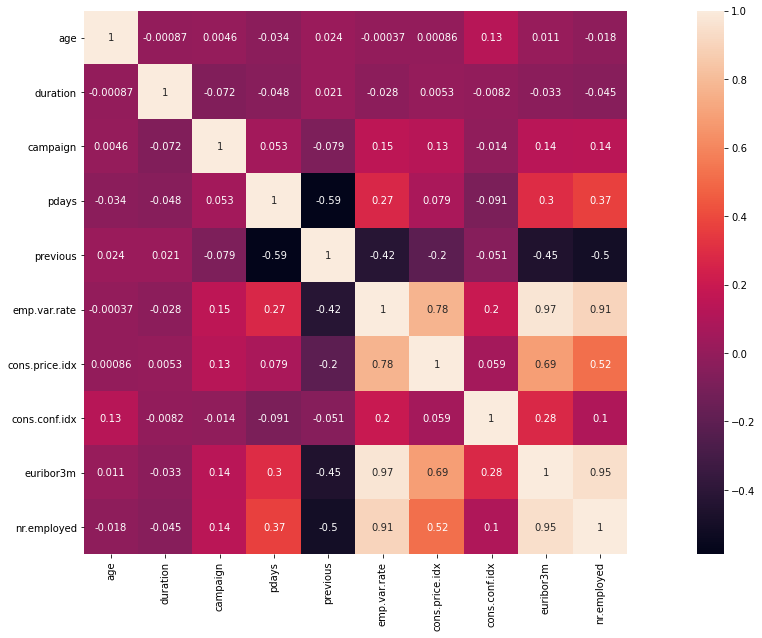

In [3]:
#Correlation of numeric features
cor=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(cor,vmax=1, square=True,annot=True)
plt.show()

Creating a new feature for higly correlated(numerical) features

In [4]:
fact=FactorAnalysis(n_components=1)
df['new_factor']=fact.fit_transform(df[['emp.var.rate', 'cons.price.idx','euribor3m','nr.employed']])
df.drop(['emp.var.rate', 'cons.price.idx','euribor3m','nr.employed'], axis=1, inplace=True)
df.head(5)

C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not converge.' +


,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,cons.conf.idx,y,new_factor
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,-36.4,no,-0.709946
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,-36.4,no,-0.709946
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,-36.4,no,-0.709946
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,nonexistent,-36.4,no,-0.709946
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,-36.4,no,-0.709946


In [5]:
#Dropping unknow values form dataset
df.drop(df[df['job'] == 'unknown' ].index , inplace=True)
df.drop(df[df['marital'] == 'unknown' ].index , inplace=True)
df.drop(df[df['education'] == 'unknown' ].index , inplace=True)
df.drop(df[df['default'] == 'unknown' ].index , inplace=True)
df.drop(df[df['housing'] == 'unknown' ].index , inplace=True)
df.drop(df[df['loan'] == 'unknown' ].index , inplace=True)

In [6]:
#Assigning numerical values for categorical features
df['poutcome']=  df['poutcome'].map({'nonexistent':1, 'failure':2, 'success':3})
df['housing'] = df['housing'].map({'no':1, 'yes':2})
df['loan'] = df['loan'].map({'no':1, 'yes':2})
df['default'] = df['default'].map({'no':1, 'yes':2})
df['job'] = df['job'].map({'housemaid':1, 'services':2, 'admin.':3, 'blue-collar':4, 'technician':5,
       'retired':6, 'management':7, 'unemployed':8, 'self-employed':9,
       'entrepreneur':10, 'student':11})
df['y'] = df['y'].map({'no':0, 'yes':1})
df["marital"] = df["marital"].astype('category')
df["marital"] = df["marital"].cat.codes
df["education"] = df["education"].astype('category')
df["education"] = df["education"].cat.codes

#changing numeric (age,pdays,duration) to categorical
d = {range(0, 25): 3, range(25, 42): 1, range(42, 58): 2,range(58, 90): 4}
df['age'] = df['age'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
d = {range(1, 10): 1, range(10, 20): 2, range(20, 1000): 0}
df['pdays'] = df['pdays'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
d = {range(1, 60): 1, range(60, 200): 2, range(200, 600): 3, range(600, 1000): 4,range(1000, 5000): 5}
df['duration'] = df['duration'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
df.head(5)

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,cons.conf.idx,y,new_factor
0,2,1,1,0,1,1,1,3,1,0,0,1,-36.4,0,-0.709946
2,1,2,1,3,1,2,1,3,1,0,0,1,-36.4,0,-0.709946
3,1,3,1,1,1,1,1,2,1,0,0,1,-36.4,0,-0.709946
4,2,2,1,3,1,1,2,3,1,0,0,1,-36.4,0,-0.709946
6,4,3,1,5,1,1,1,2,1,0,0,1,-36.4,0,-0.709946


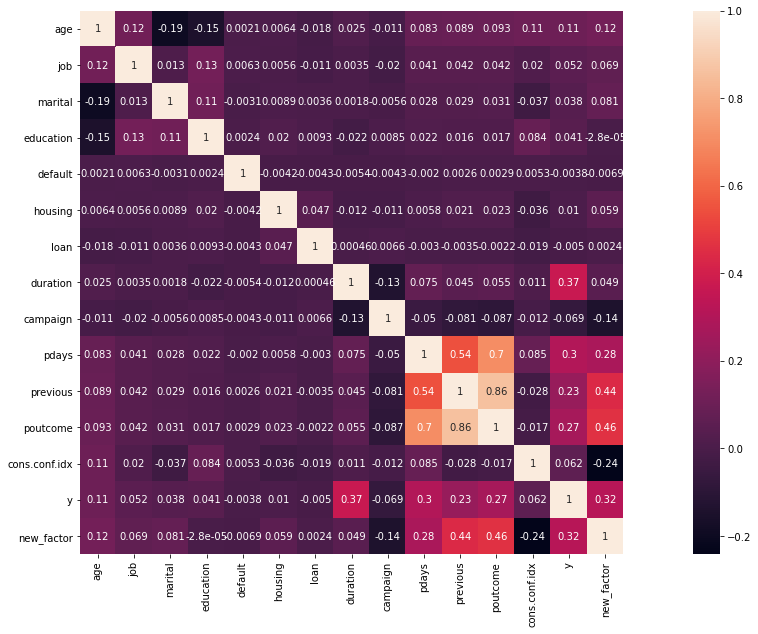

In [7]:
#Correlation of catergorical features
cor=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(cor,vmax=1, square=True,annot=True)
plt.show()

Creating a new feature for higly correlated (categorical) features

In [8]:
fact=FactorAnalysis(n_components=1)
df['newp_factor']=fact.fit_transform(df[['pdays', 'previous','poutcome']])
df.drop(['pdays', 'previous','poutcome'], axis=1, inplace=True)
df.head(5)

C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not converge.' +


,age,job,marital,education,default,housing,loan,duration,campaign,cons.conf.idx,y,new_factor,newp_factor
0,2,1,1,0,1,1,1,3,1,-36.4,0,-0.709946,-0.39667
2,1,2,1,3,1,2,1,3,1,-36.4,0,-0.709946,-0.39667
3,1,3,1,1,1,1,1,2,1,-36.4,0,-0.709946,-0.39667
4,2,2,1,3,1,1,2,3,1,-36.4,0,-0.709946,-0.39667
6,4,3,1,5,1,1,1,2,1,-36.4,0,-0.709946,-0.39667


# Upsampling

In [9]:
def upsample(df):
    df_M = df[df.y == 0]
    df_m = df[df.y == 1]
    df_m_upsample = resample(df_m,
                            replace = True,
                            n_samples=df_M.shape[0],
                            random_state=1)
    df_up = pd.concat([df_M,df_m_upsample],axis=0)
    y = df_up.y
    X = df_up.drop('y',axis=1)
    return X,y
X,y=upsample(df)

In [10]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Decision Tree

([<matplotlib.axis.XTick at 0x25fe1f706a0>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, '11'),
  Text(10, 0, '12'),
  Text(11, 0, '13'),
  Text(12, 0, '14')])

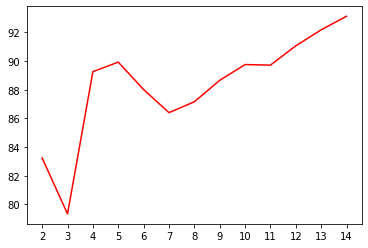

In [11]:
#Checking for best max_depth
rec=[]
prec=[]
acc=[]
f1 =[]
for i in range(2,15):
    regressor=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    rec.append(metrics.recall_score(y_test, y_pred)*100)
    prec.append(metrics.precision_score(y_test, y_pred)*100)
    acc.append(metrics.accuracy_score(y_test, y_pred)*100)
    f1.append(metrics.f1_score(y_test, y_pred)*100)
plt.plot(rec,'r')
#plt.plot(prec,'b')
#plt.plot(acc,'g')
#plt.plot(f1,'y')
plt.xticks(list(range(len(rec))), list(range(2,15)))

([<matplotlib.axis.XTick at 0x25fe1ce9310>,
 [Text(0, 0, '2'),
  Text(1, 0, '7'),
  Text(2, 0, '12'),
  Text(3, 0, '17'),
  Text(4, 0, '22'),
  Text(5, 0, '27'),
  Text(6, 0, '32'),
  Text(7, 0, '37'),
  Text(8, 0, '42'),
  Text(9, 0, '47'),
  Text(10, 0, '52'),
  Text(11, 0, '57'),
  Text(12, 0, '62'),
  Text(13, 0, '67'),
  Text(14, 0, '72'),
  Text(15, 0, '77'),
  Text(16, 0, '82'),
  Text(17, 0, '87'),
  Text(18, 0, '92'),
  Text(19, 0, '97')])

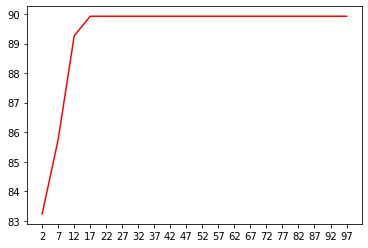

In [12]:
#Checking for best max_leaf_node
rec=[]
prec=[]
acc=[]
for i in range(2,100,5):
    regressor=DecisionTreeClassifier(criterion="entropy",max_depth = 5, max_leaf_nodes=i)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    rec.append(metrics.recall_score(y_test, y_pred)*100)
    prec.append(metrics.precision_score(y_test, y_pred)*100)
    acc.append(metrics.accuracy_score(y_test, y_pred)*100)

plt.plot(rec,'r')
#plt.plot(prec,'b')
#plt.plot(acc,'g')
plt.xticks(list(range(len(rec))), list(range(2,100,5)))

From above graphs fix max_leaf_nodes = 20 and max_depth = 5 (also considering the case of overfitting)

In [13]:
#Training decisiontree
DT=DecisionTreeClassifier(criterion="entropy",max_depth=5, max_leaf_nodes=20)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=20)

In [14]:
#Predtion for test set and some metrics result
y_pred = DT.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')
print("Precision:",metrics.precision_score(y_test, y_pred)*100,'%')
print("Recall:",metrics.recall_score(y_test, y_pred)*100,'%')
print("F1:",metrics.f1_score(y_test, y_pred)*100,'%')

Accuracy: 85.27037176117162 %
Precision: 82.07123098201936 %
Recall: 89.92233377533624 %
F1: 85.81759016541625 %


# Random Forest

([<matplotlib.axis.XTick at 0x25fe1f2d1c0>,
 [Text(0, 0, '10'),
  Text(1, 0, '30'),
  Text(2, 0, '50'),
  Text(3, 0, '70'),
  Text(4, 0, '90'),
  Text(5, 0, '110'),
  Text(6, 0, '130'),
  Text(7, 0, '150'),
  Text(8, 0, '170'),
  Text(9, 0, '190')])

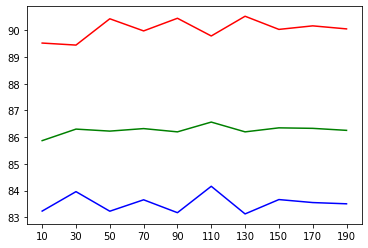

In [15]:
#Checking for best number of trees
rec=[]
prec=[]
acc=[]
for i in range(10,200,20):
    clf=RandomForestClassifier(n_estimators=i,n_jobs=-1, max_depth=8)
    clf.fit(X_train,y_train.values.ravel())
    y_pred=clf.predict(X_test)
    rec.append(metrics.recall_score(y_test, y_pred)*100)
    prec.append(metrics.precision_score(y_test, y_pred)*100)
    acc.append(metrics.accuracy_score(y_test, y_pred)*100)
    
plt.plot(rec,'r')
plt.plot(prec,'b')
plt.plot(acc,'g')
plt.xticks(list(range(len(rec))), list(range(10,200,20)))

From the above graph fix n_estimators=100

In [16]:
#Training random forest
RF=RandomForestClassifier(n_estimators=100,n_jobs=-1, max_depth=8)
RF.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=8, n_jobs=-1)

In [17]:
#Predtion for test set and some metrics result
y_pred=RF.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')
print("Precision:",metrics.precision_score(y_test, y_pred)*100,'%')
print("Recall:",metrics.recall_score(y_test, y_pred)*100,'%')
print("F1:",metrics.f1_score(y_test, y_pred)*100,'%')

Accuracy: 86.00262861434473 %
Precision: 83.28646748681898 %
Recall: 89.77078992233378 %
F1: 86.40714741544352 %


# Naive Bayes

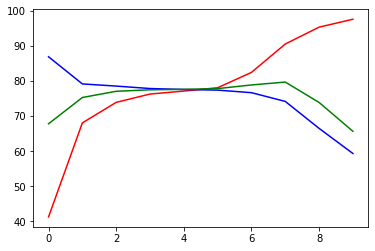

In [18]:
rec=[]
prec=[]
acc=[]
L = np.logspace(0,-9,num=100)
for j in range(0,len(L),10):
    i = L[j]
    model=GaussianNB(var_smoothing=i)
    model.fit(X_train,y_train.values.ravel())
    y_pred=model.predict(X_test)
    rec.append(metrics.recall_score(y_test, y_pred)*100)
    prec.append(metrics.precision_score(y_test, y_pred)*100)
    acc.append(metrics.accuracy_score(y_test, y_pred)*100)
    
plt.plot(rec,'r')
plt.plot(prec,'b')
plt.plot(acc,'g')

In [19]:
nb = GaussianNB()
params = {'priors':[None],
          'var_smoothing':np.logspace(0,-9,num=100)}

gs_NB = GridSearchCV(estimator=nb,
                    param_grid = params,
                    verbose = 1,
                    cv = 10,
                    n_jobs=-1)
gs_NB.fit(X_train,y_train.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   27.0s finished


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None],
                         'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [20]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=6.579332246575682e-07)

In [21]:
#Training naive bayes
NB = GaussianNB(var_smoothing=6.579332246575682e-07)
NB.fit(X_train,y_train.values.ravel())

GaussianNB(var_smoothing=6.579332246575682e-07)

In [22]:
#predtion for test set and some metrics result
y_pred=NB.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')
print("Precision:",metrics.precision_score(y_test, y_pred)*100,'%')
print("Recall:",metrics.recall_score(y_test, y_pred)*100,'%')
print("F1:",metrics.f1_score(y_test, y_pred)*100,'%')

Accuracy: 79.94742771310553 %
Precision: 75.13193667039822 %
Recall: 88.99412767569615 %
F1: 81.47762747138398 %
